In [617]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np

import timing_model_scheduler as tms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Potato Robot Examples, Basics

## First Three Operations

In [618]:
# Define operations
ops = {}
ops['wash'] = 10
ops['peel'] = 20
ops['chop'] = 15

conflicts = np.zeros([len(ops), len(ops)])

tms.define_conflict_by_name(conflicts, ops, 'wash', 'wash')

tms.define_conflict_by_name(conflicts, ops, 'peel', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'peel', 'peel')

tms.define_conflict_by_name(conflicts, ops, 'chop', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'chop', 'peel')
tms.define_conflict_by_name(conflicts, ops, 'chop', 'chop')

# Run scheduler
num_items = 12
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration}")

schedule_efficiency = tms.calc_schedule_efficiency(schedule, ops)
print(f"Schedule efficiency is {schedule_efficiency:.2%}")

tms.plot_schedule(schedule, ops, label_size=10)

Total Schedule duration is 540.0
Schedule efficiency is 8.33%
Importing plotting tools...
Generating plot...


## Groups of Four Potatoes, 3 Operations

In [619]:
# Define operations
ops['wash'] = 10*4
ops['peel'] = 20*4
ops['chop'] = 15*4

# Run scheduler
num_items = 3 # groups of 4 potatoes
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration}")

schedule_efficiency = tms.calc_schedule_efficiency(schedule, ops)
print(f"Schedule efficiency is {schedule_efficiency:.2%}")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 540.0
Schedule efficiency is 33.33%
Importing plotting tools...
Generating plot...


# Potato Robot Examples, Resource Conflicts

## One Group, All Operations

In [620]:
# Define operations
ops = {}
ops['wash'] = 40
ops['peel'] = 80
ops['chop'] = 60
ops['boil'] = 10*60
ops['dry'] = 5*60
ops['mash'] = 10*60

conflicts = np.zeros([len(ops), len(ops)])

tms.define_conflict_by_name(conflicts, ops, 'wash', 'wash')

tms.define_conflict_by_name(conflicts, ops, 'peel', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'peel', 'peel')

tms.define_conflict_by_name(conflicts, ops, 'chop', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'chop', 'peel')
tms.define_conflict_by_name(conflicts, ops, 'chop', 'chop')

tms.define_conflict_by_name(conflicts, ops, 'boil', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'boil', 'peel')
tms.define_conflict_by_name(conflicts, ops, 'boil', 'chop')
tms.define_conflict_by_name(conflicts, ops, 'boil', 'boil')

tms.define_conflict_by_name(conflicts, ops, 'dry', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'dry', 'peel')
tms.define_conflict_by_name(conflicts, ops, 'dry', 'chop')
tms.define_conflict_by_name(conflicts, ops, 'dry', 'boil')
tms.define_conflict_by_name(conflicts, ops, 'dry', 'dry')

tms.define_conflict_by_name(conflicts, ops, 'mash', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'mash', 'peel')
tms.define_conflict_by_name(conflicts, ops, 'mash', 'chop')
tms.define_conflict_by_name(conflicts, ops, 'mash', 'boil')
tms.define_conflict_by_name(conflicts, ops, 'mash', 'dry')
tms.define_conflict_by_name(conflicts, ops, 'mash', 'mash')

# Run scheduler
num_items = 1
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({schedule_duration/60} minutes)")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 1680.0 (28.0 minutes)
Importing plotting tools...
Generating plot...


## Two Groups

In [621]:
# Run scheduler
num_items = 2
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({schedule_duration/60} minutes)")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 3360.0 (56.0 minutes)
Importing plotting tools...
Generating plot...


## Two Groups, Relaxed Resource Conflicts

In [622]:
conflicts = np.zeros([len(ops), len(ops)])

tms.define_conflict_by_name(conflicts, ops, 'wash', 'wash')

tms.define_conflict_by_name(conflicts, ops, 'peel', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'peel', 'peel')

tms.define_conflict_by_name(conflicts, ops, 'chop', 'wash')
tms.define_conflict_by_name(conflicts, ops, 'chop', 'peel')
tms.define_conflict_by_name(conflicts, ops, 'chop', 'chop')

# Run scheduler
num_items = 2
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({schedule_duration/60} minutes)")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 1860.0 (31.0 minutes)
Importing plotting tools...
Generating plot...


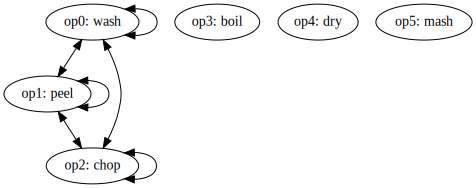

In [623]:
tms.graph_conflicts(ops, conflicts)

## 8-Potato Groups

In [624]:
ops = {}
ops['wash/peel/chop'] = 360
ops['boil/dry/mash'] = 1500

conflicts = np.zeros([len(ops), len(ops)])

tms.define_conflict_by_name(conflicts, ops, 'wash/peel/chop', 'wash/peel/chop')

tms.define_conflict_by_name(conflicts, ops, 'boil/dry/mash', 'boil/dry/mash')

# Run scheduler
num_items = 2
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({schedule_duration/60} minutes)")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 3360.0 (56.0 minutes)
Importing plotting tools...
Generating plot...


In [625]:
num_items = 4
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({schedule_duration/60} minutes)")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 6360.0 (106.0 minutes)
Importing plotting tools...
Generating plot...


# Hot Dog Example

## Single Nozzle Design

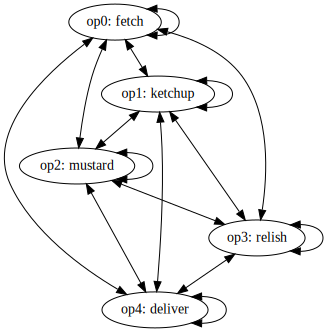

In [626]:
ops = {}

ops['fetch'] = 5
ops['ketchup'] = 2
ops['mustard'] = 2
ops['relish'] = 5
ops['deliver'] = 5

num_ops = len(ops)
conflicts = np.zeros([num_ops, num_ops])

tms.define_conflict_by_name(conflicts, ops, 'fetch', 'fetch')

tms.define_conflict_by_name(conflicts, ops, 'ketchup', 'fetch')
tms.define_conflict_by_name(conflicts, ops, 'ketchup', 'ketchup')

tms.define_conflict_by_name(conflicts, ops, 'mustard', 'fetch')
tms.define_conflict_by_name(conflicts, ops, 'mustard', 'ketchup')
tms.define_conflict_by_name(conflicts, ops, 'mustard', 'mustard')

tms.define_conflict_by_name(conflicts, ops, 'relish', 'fetch')
tms.define_conflict_by_name(conflicts, ops, 'relish', 'ketchup')
tms.define_conflict_by_name(conflicts, ops, 'relish', 'mustard')
tms.define_conflict_by_name(conflicts, ops, 'relish', 'relish')

tms.define_conflict_by_name(conflicts, ops, 'deliver', 'fetch')
tms.define_conflict_by_name(conflicts, ops, 'deliver', 'ketchup')
tms.define_conflict_by_name(conflicts, ops, 'deliver', 'mustard')
tms.define_conflict_by_name(conflicts, ops, 'deliver', 'relish')
tms.define_conflict_by_name(conflicts, ops, 'deliver', 'deliver')

tms.graph_conflicts(ops, conflicts)

In [627]:
num_items = 3

# Run scheduler
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration}")

schedule_efficiency = tms.calc_schedule_efficiency(schedule, ops)
print(f"Schedule efficiency is {schedule_efficiency:.2%}")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 57.0
Schedule efficiency is 33.33%
Importing plotting tools...
Generating plot...


## Pitch-wise Dispense

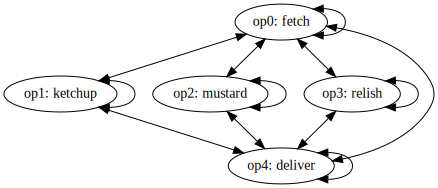

In [628]:
conflicts = np.zeros([num_ops, num_ops])

tms.define_conflict_by_name(conflicts, ops, 'fetch', 'fetch')

tms.define_conflict_by_name(conflicts, ops, 'ketchup', 'fetch')
tms.define_conflict_by_name(conflicts, ops, 'ketchup', 'ketchup')

tms.define_conflict_by_name(conflicts, ops, 'mustard', 'fetch')
# tms.define_conflict_by_name(conflicts, ops, 'mustard', 'ketchup')
tms.define_conflict_by_name(conflicts, ops, 'mustard', 'mustard')

tms.define_conflict_by_name(conflicts, ops, 'relish', 'fetch')
# tms.define_conflict_by_name(conflicts, ops, 'relish', 'ketchup')
# tms.define_conflict_by_name(conflicts, ops, 'relish', 'mustard')
tms.define_conflict_by_name(conflicts, ops, 'relish', 'relish')

tms.define_conflict_by_name(conflicts, ops, 'deliver', 'fetch')
tms.define_conflict_by_name(conflicts, ops, 'deliver', 'ketchup')
tms.define_conflict_by_name(conflicts, ops, 'deliver', 'mustard')
tms.define_conflict_by_name(conflicts, ops, 'deliver', 'relish')
tms.define_conflict_by_name(conflicts, ops, 'deliver', 'deliver')

tms.graph_conflicts(ops, conflicts)

### Incorrect Model

In [629]:
num_items = 3

# Run scheduler
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration}")

schedule_efficiency = tms.calc_schedule_efficiency(schedule, ops)
print(f"Schedule efficiency is {schedule_efficiency:.2%}")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 49.0
Schedule efficiency is 38.78%
Importing plotting tools...
Generating plot...


### Equal Duration Model

In [630]:
ops['ketchup'] = 5
ops['mustard'] = 5

# Run scheduler
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration}")

schedule_efficiency = tms.calc_schedule_efficiency(schedule, ops)
print(f"Schedule efficiency is {schedule_efficiency:.2%}")

tms.plot_schedule(schedule, ops)


Total Schedule duration is 55.0
Schedule efficiency is 45.45%
Importing plotting tools...
Generating plot...


### Sync Start Schedule

In [631]:
ops['ketchup'] = 2
ops['mustard'] = 2

# Run scheduler
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=True)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration}")

schedule_efficiency = tms.calc_schedule_efficiency(schedule, ops)
print(f"Schedule efficiency is {schedule_efficiency:.2%}")

tms.plot_schedule(schedule, ops)

Total Schedule duration is 49.0
Schedule efficiency is 38.78%
Importing plotting tools...
Generating plot...


# Schedules with Waiting

## Single Cycle, Conflicts

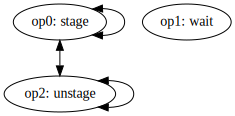

In [632]:
ops_single = {}

ops_single['stage'] = 20
ops_single['wait'] = 3*60
ops_single['unstage'] = 5

num_ops_single = len(ops_single)
conflicts_single = np.zeros([num_ops_single, num_ops_single])

tms.define_conflict_by_name(conflicts_single, ops_single, 'stage', 'stage')

tms.define_conflict_by_name(conflicts_single, ops_single, 'unstage', 'stage')
tms.define_conflict_by_name(conflicts_single, ops_single, 'unstage', 'unstage')

tms.graph_conflicts(ops_single, conflicts_single)


## 2 Slots, Multiple Cycles

In [633]:
# Generate new set op operations that repeats multiple times
num_cycles = 4
(ops, conflicts) = tms.generate_sequential_ops(ops_single, conflicts_single, num_cycles)


# Run scheduler
num_items = 2
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({(schedule_duration/60.0):.3f} minutes)")
print(f"Estimated throughput is {(num_items * num_cycles) / (schedule_duration/60.0):.2f} hot dogs per minute")

tms.plot_schedule(schedule, ops, label_size=10)

Total Schedule duration is 845.0 (14.083 minutes)
Estimated throughput is 0.57 hot dogs per minute
Importing plotting tools...
Generating plot...


## 4 Slots

In [634]:
# Run scheduler
num_items = 4
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({(schedule_duration/60.0):.3f} minutes)")
print(f"Estimated throughput is {(num_items * num_cycles) / (schedule_duration/60.0):.2f} hot dogs per minute")

tms.plot_schedule(schedule, ops, label_size=10)

Total Schedule duration is 895.0 (14.917 minutes)
Estimated throughput is 1.07 hot dogs per minute
Importing plotting tools...
Generating plot...


## Many Slots

In [635]:
# Run scheduler
num_items = 16
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({(schedule_duration/60.0):.3f} minutes)")
print(f"Estimated throughput is {(num_items * num_cycles) / (schedule_duration/60.0):.2f} hot dogs per minute")

tms.plot_schedule(schedule, ops, label_size=10)

Total Schedule duration is 1705.0 (28.417 minutes)
Estimated throughput is 2.25 hot dogs per minute
Importing plotting tools...
Generating plot...


## Many Slots, Avoid Robot Jumps

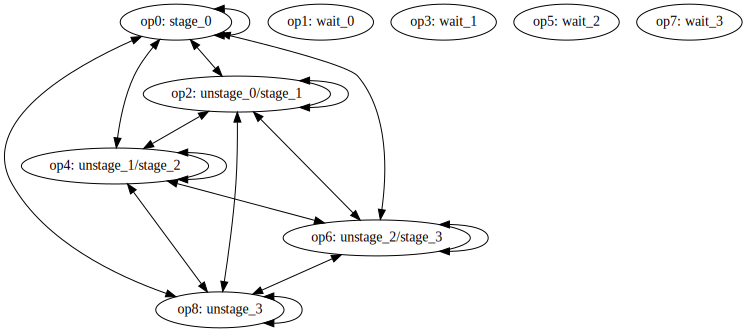

In [636]:
(ops, conflicts) = tms.generate_A_B_wait_ops(
    ops_single=ops_single,
    A_names=['stage'],
    B_names=['unstage'],
    wait_names=['wait'],
    num_cycles=num_cycles
)

tms.graph_conflicts(ops, conflicts)

In [637]:
schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({(schedule_duration/60.0):.3f} minutes)")
print(f"Estimated throughput is {(num_items * num_cycles) / (schedule_duration/60.0):.2f} hot dogs per minute")

tms.plot_schedule(schedule, ops, label_size=8)

Total Schedule duration is 1705.0 (28.417 minutes)
Estimated throughput is 2.25 hot dogs per minute
Importing plotting tools...
Generating plot...


## Optimum Number of Slots

In [638]:
import plotly.graph_objects as go

# Initialize lists to store data
num_items_list = []
throughput_list = []
efficiency_list = []

# Generate data
for num_items in range(1, 24):
  schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)
  schedule_duration = tms.calc_schedule_duration(schedule, ops)
  schedule_efficiency = tms.calc_schedule_efficiency(schedule, ops)
  throughput = (num_items * num_cycles) / (schedule_duration / 60.0)
  num_items_list.append(num_items)
  throughput_list.append(throughput)
  efficiency_list.append(schedule_efficiency)

# Create the plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=num_items_list, y=throughput_list, mode='lines+markers', name='Throughput (Hot Dogs/min)'))
fig.add_trace(go.Scatter(x=num_items_list, y=efficiency_list, mode='lines+markers', name="Efficiency (%)", yaxis='y2'))

# Set plot titles and labels
fig.update_layout(
  title='Throughput vs. Number of Items',
  xaxis_title='Number of Slots',
  yaxis=dict(
      title='Throughput (boxes/min)'
  ),
  yaxis2=dict(
      title='Efficiency (%)',
      overlaying='y',
      side='right'
  )
)

# Show the plot
fig.show()

## Analytical Approach

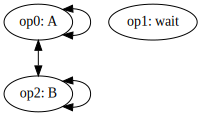

In [639]:
ops_single = {}

ops_single['A'] = 20
ops_single['wait'] = 3*60
ops_single['B'] = 5

num_ops_single = len(ops_single)
conflicts_single = np.zeros([num_ops_single, num_ops_single])

tms.define_conflict_by_name(conflicts_single, ops_single, 'A', 'A')

tms.define_conflict_by_name(conflicts_single, ops_single, 'B', 'A')
tms.define_conflict_by_name(conflicts_single, ops_single, 'B', 'B')

tms.graph_conflicts(ops_single, conflicts_single)

### Regime Alpha

In [640]:
num_items = 3
num_cycles = 4

(ops, conflicts) = tms.generate_A_B_wait_ops(
    ops_single=ops_single,
    A_names=['A'],
    B_names=['B'],
    wait_names=['wait'],
    num_cycles=num_cycles
)

schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({(schedule_duration/60.0):.3f} minutes)")

tms.plot_schedule(schedule, ops, label_size=8)

Total Schedule duration is 870.0 (14.500 minutes)
Importing plotting tools...
Generating plot...


### Regime Beta

In [641]:
ops_single['A'] = 20*2
ops_single['wait'] = 3*60
ops_single['B'] = 5*2

(ops, conflicts) = tms.generate_A_B_wait_ops(
    ops_single=ops_single,
    A_names=['A'],
    B_names=['B'],
    wait_names=['wait'],
    num_cycles=num_cycles
)

num_items = 6

schedule = tms.run_scheduler(num_items, ops, conflicts, sync_starts=False)

schedule_duration = tms.calc_schedule_duration(schedule, ops)
print(f"Total Schedule duration is {schedule_duration} ({(schedule_duration/60.0):.3f} minutes)")

tms.plot_schedule(schedule, ops, label_size=8)

Total Schedule duration is 1330.0 (22.167 minutes)
Importing plotting tools...
Generating plot...
